## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

### importing the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### loading the data as df and viewing its head

In [2]:
df=pd.read_csv('datasets/office_episodes.csv',parse_dates=['release_date'])
df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


### viewing a short summary by calling the info method

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), objec

### checking for null values

In [4]:
df.isnull().sum()

episode_number      0
season              0
episode_title       0
description         0
ratings             0
votes               0
viewership_mil      0
duration            0
release_date        0
guest_stars       159
director            0
writers             0
has_guests          0
scaled_ratings      0
dtype: int64

### making a colour-wise split for scaled ratings column 

In [5]:
col=[]
for x in df['scaled_ratings']:
    if x<0.25:
        col.append('red')
    elif x>=0.25 and x<0.50:
        col.append('orange')
    elif x>=0.50 and x<0.75:
        col.append('lightgreen')
    else: col.append('darkgreen')    

In [6]:
col[:5]

['orange', 'lightgreen', 'orange', 'orange', 'lightgreen']

In [7]:
df['color_as_per_rating']=col

### making a column called size which helps to understand if the episode has a guest star or not (bigger size indicated the presence of a guest star)

In [8]:
size=[]
for x in df['has_guests']:
    if x==True:
        size.append(250)
    else: size.append(25)    

In [18]:
size[:5]

[25, 25, 25, 25, 25]

In [10]:
df['size_as_per_guest_stars']=size

In [11]:
df.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,color_as_per_rating,size_as_per_guest_stars
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125,orange,25
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125,lightgreen,25
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500,orange,25
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875,orange,25
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250,lightgreen,25


### plotting a scatterplot between episode number(x) and viewership(y), it has been differentiated in colour and shape: colour in increasing number of rating(ligher being higher rated) and bigger shape where guest stars were present

Text(0.5, 1.0, 'Popularity, Quality, and Guest Appearances on the Office')

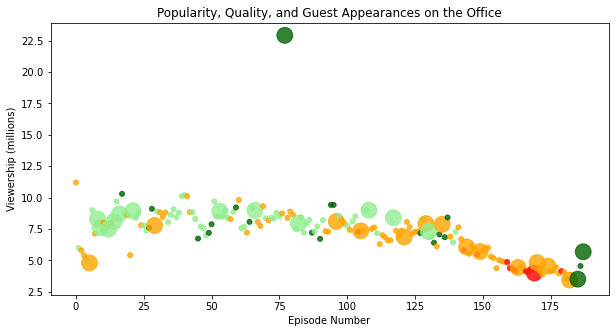

In [12]:
fig=plt.figure(figsize=(10,5))
plt.scatter(x=df['episode_number'],y=df['viewership_mil'],c=col,alpha=0.8,s=size)
plt.xlabel('Episode Number')
plt.ylabel('Viewership (millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')

### top stars in terms of views

In [13]:
top_stars=df[df['viewership_mil']==df['viewership_mil'].max()]['guest_stars']
top_stars

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

### lets find the guest stars whose episodes got the most average rating

In [14]:
df[['guest_stars','scaled_ratings']]

,guest_stars,scaled_ratings
0,NaN,0.28125
1,NaN,0.53125
2,NaN,0.37500
3,NaN,0.46875
4,NaN,0.56250
...,...,...
183,NaN,0.43750
184,NaN,0.43750
185,Michael Imperioli,0.75000
186,NaN,0.90625


In [15]:
df.groupby('guest_stars').mean()['scaled_ratings'].sort_values(ascending=False)[:5]

guest_stars
Joan Cusack, Ed Begley Jr, Rachel Harris, Nancy Walls    1.00000
Cloris Leachman, Jack Black, Jessica Alba                0.96875
Michael Imperioli                                        0.75000
Tim Meadows                                              0.62500
Rob Riggle                                               0.62500
Name: scaled_ratings, dtype: float64

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='guest_stars', ylabel='scaled_ratings'>

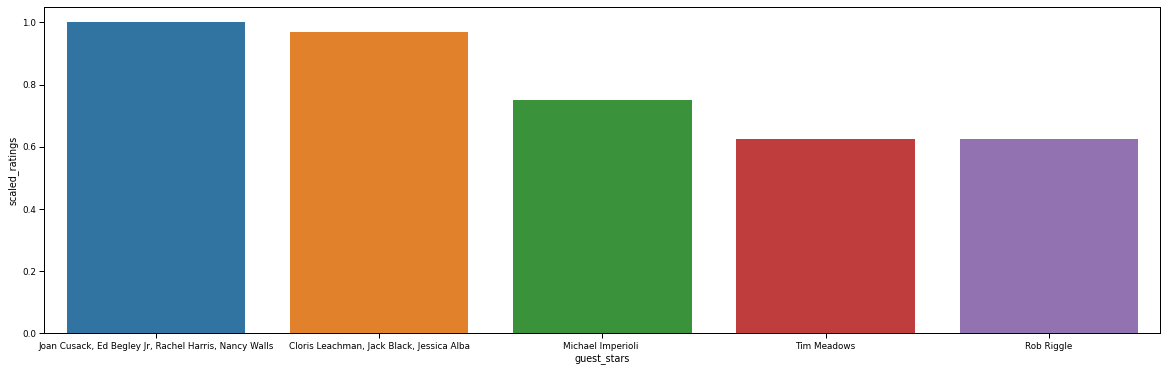

In [62]:
plt.figure(figsize=(20,6))
sns.set_context("paper", font_scale=1)
sns.barplot(x=df.groupby('guest_stars').mean().sort_values('scaled_ratings',ascending=False).index[:5],y=df.groupby('guest_stars').mean()['scaled_ratings'].sort_values(ascending=False)[:5])


### lets see the top 5 directors under which the show had the best scaled ratings

In [23]:
df['director'].nunique()

54

In [29]:
df.groupby('director').mean()['scaled_ratings'].sort_values(ascending=False)[:5]

director
Harold Ramis     0.695312
Jason Reitman    0.687500
Steve Carell     0.677083
Paul Feig        0.672917
Joss Whedon      0.656250
Name: scaled_ratings, dtype: float64

<AxesSubplot:xlabel='director', ylabel='scaled_ratings'>

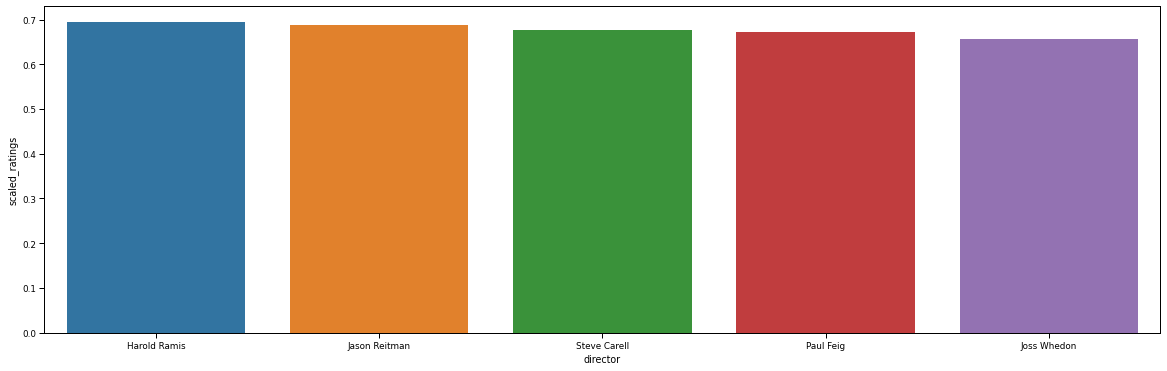

In [64]:
plt.figure(figsize=(20,6))
sns.set_context("paper", font_scale=1)
sns.barplot(x=df.groupby('director').mean().sort_values('scaled_ratings',ascending=False).index[:5],y=df.groupby('director').mean()['scaled_ratings'].sort_values(ascending=False)[:5])


### lastly, lets see which season was the most watched

In [76]:
df.groupby('season').sum()['viewership_mil'].sort_values(ascending=False)

season
5    227.67
6    201.92
3    195.37
2    179.70
7    175.34
8    129.25
4    119.67
9     95.19
1     38.20
Name: viewership_mil, dtype: float64

C:\Users\PRAKRIT SINHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='viewership_mil'>

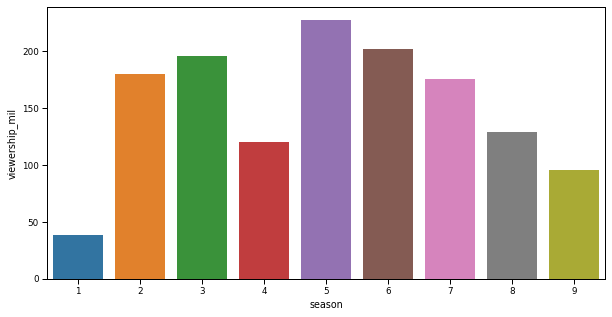

In [83]:
plt.figure(figsize=(10,5))
sns.barplot(df.groupby('season').sum()['viewership_mil'].sort_values(ascending=False).index,df.groupby('season').sum()['viewership_mil'].sort_values(ascending=False))
